In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#load the dataset
data=pd.read_csv("Mall_Customers.csv")
data=data.drop('CustomerID',axis=1)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [2]:
 # data cleaning
# null and duplicated values
data.isnull().sum()
data.duplicated().sum()

# outlier detection
num_col=data.select_dtypes(include=np.number).columns
z_score=np.abs(zscore(data[num_col]))
outlier=data[(z_score>3).any(axis=1)]

##thare is no null,dupliced values and outliers

In [3]:
# scaling
from sklearn.preprocessing import StandardScaler

num_col=data.select_dtypes(include=np.number).columns
scaler=StandardScaler()
x=scaler.fit_transform(data[num_col])
x=pd.DataFrame(x,columns=num_col)

In [4]:
# encoding
from sklearn.preprocessing import OneHotEncoder

cat_col=pd.get_dummies(data.select_dtypes(include='object'))
cat_col=cat_col.drop('Gender_Female',axis=1)
cat_col['Gender_Male']=cat_col['Gender_Male'].astype(int)

data['Gender']=cat_col
x

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


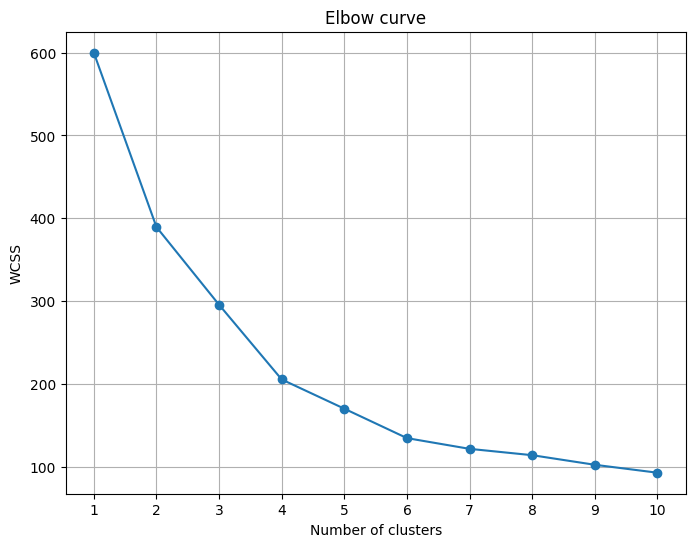

In [5]:
# elbow method for finding the k values
wc=[]
for i in range(1,11):
  kmeans=KMeans(i,random_state=42)
  kmeans.fit(x)
  wc.append(kmeans.inertia_)

# plot the elbow curve
plt.figure(figsize=(8,6))
plt.title('Elbow curve')
plt.plot(range(1,11),wc,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [6]:
# model training
k=6
model=KMeans(k,random_state=42)
model.fit(x)

# get the cluster
cluster=model.predict(x)
data['cluster']=cluster
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,5
3,0,23,16,77,2
4,0,31,17,40,5
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,4
197,1,32,126,74,1
198,1,32,137,18,4


In [7]:
# summary
summary = data.groupby('cluster').mean()
print(summary)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
cluster                                                                 
0        0.422222  56.333333           54.266667               49.066667
1        0.461538  32.692308           86.538462               82.128205
2        0.440000  25.560000           26.480000               76.240000
3        0.400000  26.125000           59.425000               44.450000
4        0.533333  44.000000           90.133333               17.933333
5        0.380952  45.523810           26.285714               19.380952


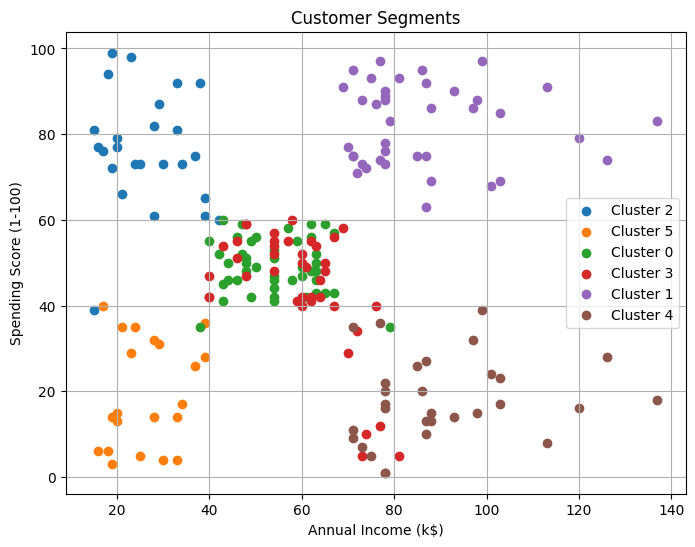

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, model.labels_)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.43106526216603014
